In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import skewnorm
from scipy.stats import exponnorm
from customplotting.general import plot_xy, save_fig
from functions import *
from pynverse import inversefunc
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [3]:
# function dn/dt
def photoluminescence(t, k1):
    def model(n, t):
        k2 = 2e-10
        dndt = -(k2*(n**2) + k1*n
        return dndt
    n0 = np.tile(np.power(10, 14), 50)
    n = odeint(model, n0, t)
    k2 = 2e-10
    pl = k2 * (n ** 2)
    return pl

SyntaxError: invalid syntax (<ipython-input-3-d7666ca19fce>, line 6)

In [4]:
pl = photoluminescence(t = np.linspace(0,1000)*1e-9, k1= np.logspace(5, 7, 50))

In [5]:
pl

array([[2.00000000e+18, 2.00000000e+18, 2.00000000e+18, ...,
        2.00000000e+18, 2.00000000e+18, 2.00000000e+18],
       [1.99023002e+18, 1.98942986e+18, 1.98855121e+18, ...,
        1.42500419e+18, 1.37830167e+18, 1.32875930e+18],
       [1.98051171e+18, 1.97891984e+18, 1.97717258e+18, ...,
        1.01543732e+18, 9.49977901e+17, 8.82921137e+17],
       ...,
       [1.59210383e+18, 1.56254993e+18, 1.53071392e+18, ...,
        2.48434884e+11, 5.18918093e+10, 9.28818361e+09],
       [1.58446562e+18, 1.55443884e+18, 1.52210676e+18, ...,
        1.77143292e+11, 3.57879252e+10, 6.17543715e+09],
       [1.57686682e+18, 1.54637274e+18, 1.51355104e+18, ...,
        1.26309746e+11, 2.46816527e+10, 4.10586462e+09]])

In [6]:
t = np.linspace(0,1000)*1e-9

In [7]:
def pl_average(pl):
    pl_sum = pl.sum(axis=-1) # weights for pl
    pl_average = np.average(pl, weights=pl_sum, axis=-1)
    return pl_average

In [8]:
pl_avg = pl_average(pl)

In [9]:
pl_avg

array([2.00000000e+18, 1.88520718e+18, 1.78920508e+18, 1.70768805e+18,
       1.63747306e+18, 1.57618623e+18, 1.52204086e+18, 1.47367924e+18,
       1.43005945e+18, 1.39037375e+18, 1.35398951e+18, 1.32040608e+18,
       1.28922315e+18, 1.26011740e+18, 1.23282503e+18, 1.20712876e+18,
       1.18284792e+18, 1.15983096e+18, 1.13794969e+18, 1.11709476e+18,
       1.09717225e+18, 1.07810090e+18, 1.05980993e+18, 1.04223733e+18,
       1.02532844e+18, 1.00903485e+18, 9.93313449e+17, 9.78125693e+17,
       9.63436952e+17, 9.49215998e+17, 9.35434565e+17, 9.22066981e+17,
       9.09089850e+17, 8.96481788e+17, 8.84223194e+17, 8.72296051e+17,
       8.60683759e+17, 8.49370984e+17, 8.38343531e+17, 8.27588233e+17,
       8.17092848e+17, 8.06845974e+17, 7.96836975e+17, 7.87055907e+17,
       7.77493462e+17, 7.68140911e+17, 7.58990057e+17, 7.50033191e+17,
       7.41263055e+17, 7.32672803e+17])

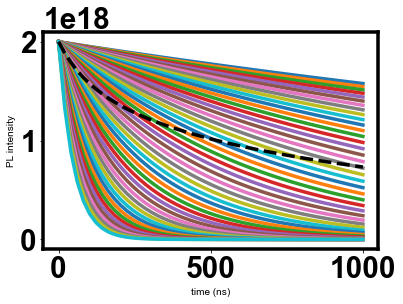

In [10]:
plt.plot(t*1e9, pl)
plt.plot(t*1e9, pl_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [11]:
stretched_exp = stretch_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 924.31687309252
Beta = 0.5787783650496324
avg. tau (ns) = 1459.9823841693976


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [12]:
double_exp = double_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 140.33860537523128
a1 = 0.30181614755916986
tau2 (ns) = 1558.064962335028
a2 = 0.6898804823085146
avg. tau (ns) = 1126.5895549740155


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [13]:
triple_exp = triple_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau1 (ns) = "+str(triple_exp[0]*1e9))
print("a1 = "+str(triple_exp[1]))
print("tau2 (ns) = "+str(triple_exp[2]*1e9))
print("a2 = "+str(triple_exp[3]))
print("tau3 (ns) = "+str(triple_exp[4]*1e9))
print("a3 (ns) = "+str(triple_exp[5]))
print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

tau1 (ns) = 95.75649124946278
a1 = 0.20269197441715436
tau2 (ns) = 625.3143071787656
a2 = 0.47917293907190117
tau3 (ns) = 6336.315940208125
a3 (ns) = 0.3164862805113196
avg. tau (ns) = 2328.238644595994


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:180: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:201: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [14]:
single_exp = single_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 1058.2060136887064
a = 0.8555147227756638
avg. tau (ns) = 1058.2060136887064


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:132: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


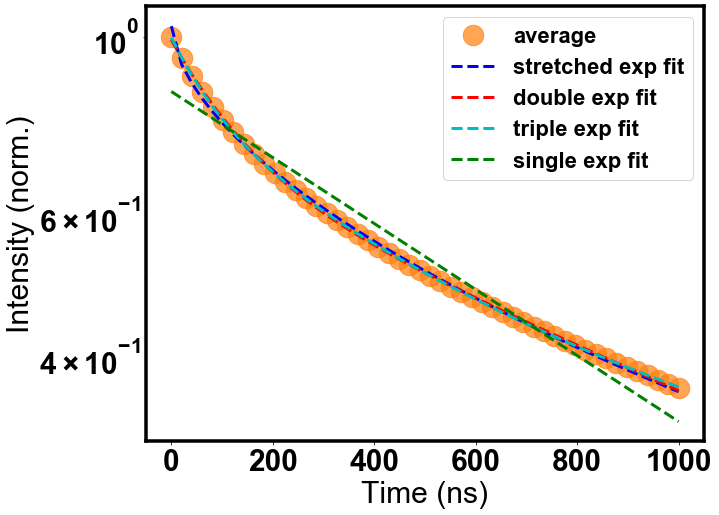

In [15]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_avg/np.max(pl_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

#### Calculation of theoretical tau : I = I0e^(-t/tau) when t = tau : I = I0/e

In [16]:
def PL_e(database):
    all_PL_e = np.array([])
    for row in database:
        PL_e = np.max(row)/np.e
        all_PL_e = np.append(all_PL_e, PL_e) 
    return all_PL_e

In [17]:
PL_e_values = PL_e(pl)

In [19]:
PL_e_values*np.e

array([2.00000000e+18, 1.99023002e+18, 1.98051171e+18, 1.97084478e+18,
       1.96122892e+18, 1.95166383e+18, 1.94214922e+18, 1.93268479e+18,
       1.92327026e+18, 1.91390532e+18, 1.90458970e+18, 1.89532310e+18,
       1.88610524e+18, 1.87693584e+18, 1.86781461e+18, 1.85874128e+18,
       1.84971557e+18, 1.84073721e+18, 1.83180591e+18, 1.82292141e+18,
       1.81408344e+18, 1.80529173e+18, 1.79654600e+18, 1.78784601e+18,
       1.77919148e+18, 1.77058215e+18, 1.76201776e+18, 1.75349805e+18,
       1.74502277e+18, 1.73659167e+18, 1.72820448e+18, 1.71986095e+18,
       1.71156084e+18, 1.70330390e+18, 1.69508988e+18, 1.68691854e+18,
       1.67878962e+18, 1.67070290e+18, 1.66265812e+18, 1.65465505e+18,
       1.64669346e+18, 1.63877309e+18, 1.63089373e+18, 1.62305514e+18,
       1.61525708e+18, 1.60749933e+18, 1.59978165e+18, 1.59210383e+18,
       1.58446562e+18, 1.57686682e+18])

I cannot do a weighted average of this because PL_e_values is a 1D array
np.nonzero

In [134]:
PL_e_values[5]

7.179769997353023e+17

In [28]:
for i in PL_e_values*np.e:
    print(np.nonzero(pl == i)[0])

[]
[1]
[2]
[]
[]
[]
[]
[7]
[8]
[9]
[10]
[11]
[12]
[]
[14]
[15]
[]
[17]
[18]
[19]
[]
[]
[22]
[23]
[]
[25]
[26]
[27]
[]
[29]
[]
[31]
[32]
[33]
[34]
[35]
[]
[37]
[38]
[]
[40]
[41]
[42]
[43]
[44]
[45]
[]
[47]
[48]
[49]


In [1]:
for i in PL_e_values:
    print(np.nonzero(pl == i)[0])

NameError: name 'PL_e_values' is not defined

In [143]:
pl[49]

array([1.57686682e+18, 1.54637274e+18, 1.51355104e+18, 1.47829511e+18,
       1.44050817e+18, 1.40010687e+18, 1.35702558e+18, 1.31122119e+18,
       1.26267840e+18, 1.21141550e+18, 1.15749046e+18, 1.10100724e+18,
       1.04212199e+18, 9.81048915e+17, 9.18065294e+17, 8.53515308e+17,
       7.87811957e+17, 7.21436532e+17, 6.54934950e+17, 5.88910325e+17,
       5.24011265e+17, 4.60915535e+17, 4.00309096e+17, 3.42860915e+17,
       2.89194463e+17, 2.39857466e+17, 1.95292014e+17, 1.55807700e+17,
       1.21560715e+17, 9.25418106e+16, 6.85755108e+16, 4.93319692e+16,
       3.43513818e+16, 2.30791179e+16, 1.49079851e+16, 9.22270207e+15,
       5.44109233e+15, 3.04698386e+15, 1.61130674e+15, 8.00127075e+14,
       3.70783358e+14, 1.59259485e+14, 6.29313076e+13, 2.26901664e+13,
       7.39775777e+12, 2.15948531e+12, 5.58290676e+11, 1.26309746e+11,
       2.46816527e+10, 4.10586462e+09])

In [147]:
np.where(pl[0] == PL_e_values[0])

(array([], dtype=int64),)

In [148]:
pl[0]

array([2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18,
       2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18,
       2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18,
       2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18,
       2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18,
       2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18, 2.e+18,
       2.e+18, 2.e+18])

In [47]:
# numpy average of PL_max/e values
PL_e_average = np.average(PL_e_values)

In [48]:
PL_e_average

6.54670976355969e+17

In [96]:
x_values = np.array([])
for row in pl:
    for i in PL_e_values:
        x_values = np.append(x_values, np.interp(i, row, t))

In [81]:
x_values_avg = np.average(x_values)

In [82]:
x_values_avg

9.388000000000004e-07

In [149]:
interp1d(PL_e_values[1], pl[1])

TypeError: object of type 'numpy.float64' has no len()

<BarContainer object of 1 artists>

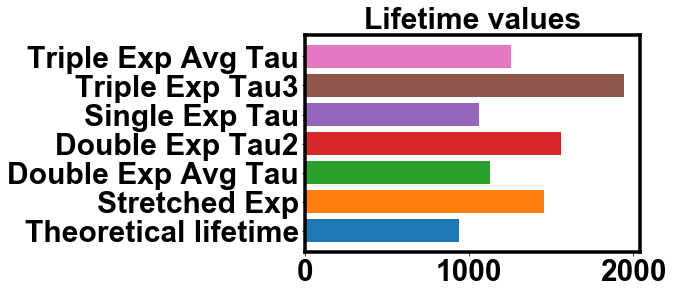

In [84]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical lifetime", x_values_avg*1e9)
plt.barh("Stretched Exp", stretched_exp[3]*1e9)
plt.barh("Double Exp Avg Tau", double_exp[4]*1e9)
plt.barh("Double Exp Tau2", double_exp[2]*1e9)
plt.barh("Single Exp Tau", single_exp[2]*1e9)
plt.barh("Triple Exp Tau3", triple_exp[4]*1e9)
plt.barh("Triple Exp Avg Tau", triple_exp[6]*1e9)

### k1 skewed gaussian distribution
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e6 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [24]:
# skewed gaussian distribution of k1 values
# search for log spaced skewed distribution
skew = skewnorm.rvs(a = 10, loc = 1e6, scale=10000000, size=50)

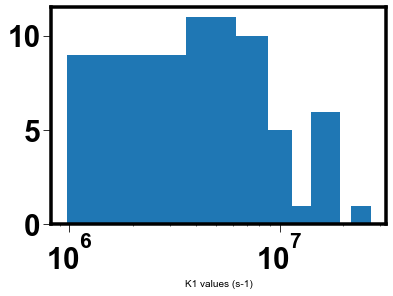

In [25]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

In [26]:
pl_skew = photoluminescence(k1= skew, n0 = np.tile(np.power(10, 15), 50), t = np.linspace(0,1000)*1e-9)

In [27]:
pl_skew_avg = pl_average(pl_skew)

take lifetime for each of the decay 1/e of max PL, then weighted average of these lifetimes --> compare it to the avg_tau from fitting --> plot the difference -->focus on comparing the tau 1 and tau 2 from biexp, and all others

(add noise to functions?)

SRV for each decay and then wigthed average , compare to the SRV of avg tau from fitting and average decay

beta tells us about the k1 distribution --> show that this is the physical meaning a change in beta is reflexed in a change in k1 --> more homogeneous than beta is closer to 1 
1) k1 : uniform distribution --> should get beta values closer to 1
2) our skewed distribution --> lower beta
3) from 1e5 to 1e7 see if beta becomes closer to 0

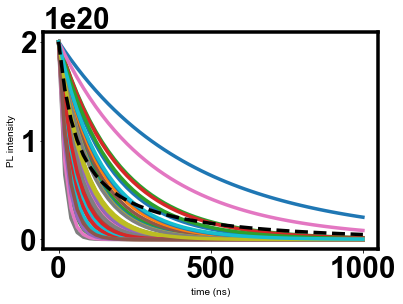

In [28]:
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [29]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

tau_c (ns) = 95.83568694827123
Beta = 0.5689798129079504
avg. tau (ns) = 155.09375863000614


In [30]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

tau1 (ns) = 62.717219004243205
a1 = 0.6583256681925117
tau2 (ns) = 380.54824524288796
a2 = 0.31338064621098183
avg. tau (ns) = 165.21947808414768


In [31]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

tau1 (ns) = 116.89540996159232
a1 = 0.3780470984066537
tau2 (ns) = 441.06401952825877
a2 = 0.23624082670024882
tau3 (ns) = 36.328490836401606
a3 (ns) = 0.384530870068582
avg. tau (ns) = 162.55073105147332


In [32]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

tau (ns) = 252.79986586275913
a = 0.6519988053010165
avg. tau (ns) = 252.79986586275913


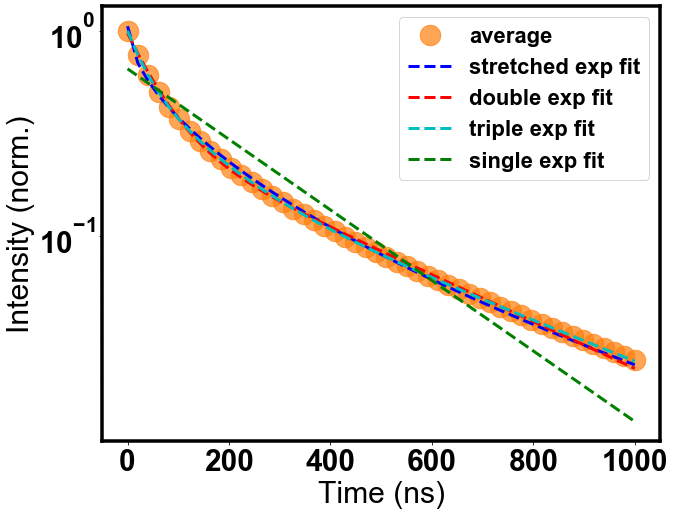

In [33]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [146]:
skew = skewnorm.rvs(a = 20, loc = 1e6, scale=1e7, size=50)

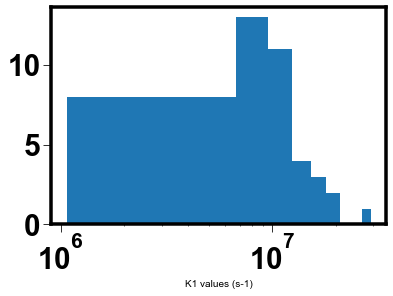

In [147]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

In [148]:
pl_skew = photoluminescence(k1= skew, n0 = np.tile(np.power(10, 14), 50), t = np.linspace(0,1000)*1e-9)

In [149]:
pl_skew_avg = pl_average(pl_skew)

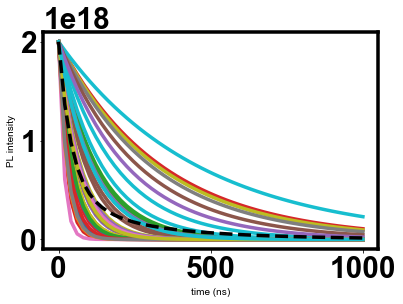

In [150]:
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [151]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

tau_c (ns) = 50.073088144858254
Beta = 0.5456179944002922
avg. tau (ns) = 86.31230941310211


In [152]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

tau1 (ns) = 47.670363528338754
a1 = 0.7914561503015916
tau2 (ns) = 295.49699668364843
a2 = 0.18992062721601322
avg. tau (ns) = 95.6309335030495


In [153]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

tau1 (ns) = 36.4493816255654
a1 = 0.5997713050188247
tau2 (ns) = 94.66100238464095
a2 = 0.25600536234822036
tau3 (ns) = 334.05195740242453
a3 (ns) = 0.14356687763971654
avg. tau (ns) = 94.11559654741713


In [154]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

tau (ns) = 176.40386228869292
a = 0.5951184547120444
avg. tau (ns) = 176.40386228869292


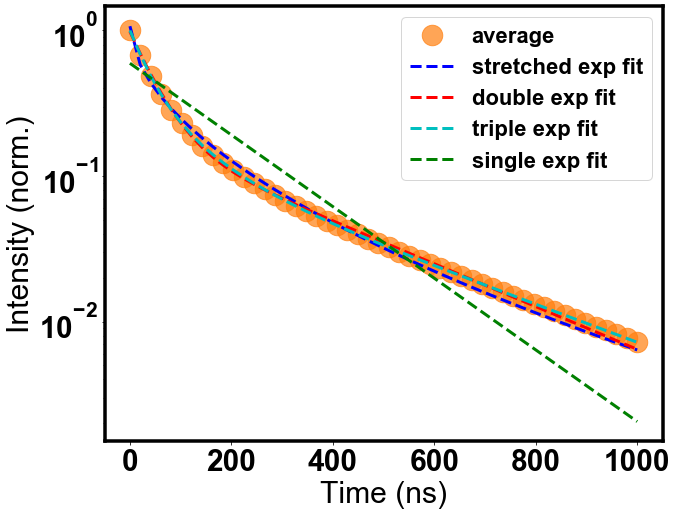

In [155]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)